In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

world_data = pd.read_csv('life-expectancy-vs-gdp-per-capita.csv')
world_data.head(10)

,Entity,Code,Year,Life expectancy,GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.638,1156.0,NaN,7752117.0,NaN
2,Afghanistan,AFG,1951,27.878,1170.0,NaN,7840151.0,NaN
3,Afghanistan,AFG,1952,28.361,1189.0,NaN,7935996.0,NaN
4,Afghanistan,AFG,1953,28.852,1240.0,NaN,8039684.0,NaN
5,Afghanistan,AFG,1954,29.350,1245.0,NaN,8151316.0,NaN
6,Afghanistan,AFG,1955,29.854,1246.0,NaN,8270992.0,NaN
7,Afghanistan,AFG,1956,30.365,1278.0,NaN,8398873.0,NaN
8,Afghanistan,AFG,1957,30.882,1253.0,NaN,8535157.0,NaN
9,Afghanistan,AFG,1958,31.403,1298.0,NaN,8680097.0,NaN


In [2]:
world_data.shape

(60133, 8)

In [6]:
continent = ['Europe', 'Asia', 'Africa', 'Antarctica', 'North America', 'Central America','US,Central America', 'South America', 'Australia']

In [19]:
#Deleting All The Continent In The 
#Cleaning Data by Removing Continent Saved As Countries
for lab, row in world_data.iterrows():
    
    if row['Entity'] in continent:
        
        world_data = world_data.drop(lab)
        
world_data.shape

(58578, 8)

In [18]:
world_data[world_data['Year'] == 2018]

,Entity,Code,Year,Life expectancy,GDP per capita,417485-annotations,Population (historical estimates),Continent
69,Afghanistan,AFG,2018,64.486000,1934.555054,NaN,3.717192e+07,NaN
588,Albania,ALB,2018,78.458000,11104.166016,NaN,2.882735e+06,NaN
850,Algeria,DZA,2018,76.693000,14228.025391,NaN,4.222842e+07,NaN
1106,American Samoa,ASM,2018,73.679000,NaN,NaN,5.546100e+04,NaN
1226,Americas,NaN,2018,76.728427,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
59070,World,OWID_WRL,2018,72.386000,15212.415039,NaN,7.631091e+09,NaN
59323,Yemen,YEM,2018,66.096000,2284.889893,NaN,2.849868e+07,NaN
59612,Yugoslavia,OWID_YGS,2018,NaN,16558.312500,NaN,NaN,NaN
59681,Zambia,ZMB,2018,63.510000,3534.033691,NaN,1.735171e+07,NaN


In [189]:
#Selecting Only The Columns We Really Need
world_data_maincol = world_data.loc[:,['Entity', 'Code', 'Year', 'Life expectancy', 'GDP per capita', 'Population (historical estimates)','Continent']]
world_data_maincol

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.638,1156.0,7752117.0,NaN
2,Afghanistan,AFG,1951,27.878,1170.0,7840151.0,NaN
3,Afghanistan,AFG,1952,28.361,1189.0,7935996.0,NaN
4,Afghanistan,AFG,1953,28.852,1240.0,8039684.0,NaN
...,...,...,...,...,...,...,...
60128,Zimbabwe,ZWE,1948,NaN,NaN,2624453.0,NaN
60129,Zimbabwe,ZWE,1949,NaN,NaN,2681604.0,NaN
60130,Zimbabwe,ZWE,2020,NaN,NaN,14862927.0,NaN
60131,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [191]:
#Remove All Rows That Has No Value For GDP And Life Expectancy
for lab, rows in world_data_maincol.iterrows():
    
    if pd.isna(rows['Life expectancy']) == True or pd.isna(rows['GDP per capita']) == True:
        
        world_data_maincol = world_data_maincol.drop(lab)
        
world_data_maincol

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
1,Afghanistan,AFG,1950,27.638,1156.000000,7752117.0,NaN
2,Afghanistan,AFG,1951,27.878,1170.000000,7840151.0,NaN
3,Afghanistan,AFG,1952,28.361,1189.000000,7935996.0,NaN
4,Afghanistan,AFG,1953,28.852,1240.000000,8039684.0,NaN
5,Afghanistan,AFG,1954,29.350,1245.000000,8151316.0,NaN
...,...,...,...,...,...,...,...
59937,Zimbabwe,ZWE,2014,58.410,1594.000000,13586710.0,NaN
59938,Zimbabwe,ZWE,2015,59.534,1560.000000,13814642.0,Africa
59939,Zimbabwe,ZWE,2016,60.294,1534.000000,14030338.0,NaN
59940,Zimbabwe,ZWE,2017,60.812,1582.366211,14236599.0,NaN


In [192]:
country_data = pd.read_csv('country_capitals.csv', on_bad_lines='skip')
country_data.head(10)

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
5,Nauru,Yaren,-0.547700,166.920867,NR,Australia
6,Saint Martin,Marigot,18.073100,-63.082200,MF,North America
7,Tokelau,Atafu,-9.166667,-171.833333,TK,Australia
8,Western Sahara,El-Aaiún,27.153611,-13.203333,EH,Africa
9,Afghanistan,Kabul,34.516667,69.183333,AF,Asia


In [193]:
#Selecting Only The Columns We Need, Just The CountryName And ContinentName
country_data = country_data.loc[:,['CountryName', 'CapitalName', 'ContinentName']]
country_data

,CountryName,CapitalName,ContinentName
0,Somaliland,Hargeisa,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,Antarctica
3,Palestine,Jerusalem,Asia
4,Aland Islands,Mariehamn,Europe
...,...,...,...
238,Northern Cyprus,North Nicosia,Europe
239,Hong Kong,NaN,Asia
240,Heard Island and McDonald Islands,NaN,Antarctica
241,British Indian Ocean Territory,Diego Garcia,Africa


In [194]:
for lab, rows in world_data_maincol.iterrows():
    
    if pd.isna(rows['Continent']) == True:
        
        for clab, crows in country_data.iterrows():
            
            if rows['Entity'] == crows['CountryName']:
                
                world_data_maincol.loc[lab,'Continent'] = crows['ContinentName']
                
world_data_maincol.head(10)

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
1,Afghanistan,AFG,1950,27.638,1156.0,7752117.0,Asia
2,Afghanistan,AFG,1951,27.878,1170.0,7840151.0,Asia
3,Afghanistan,AFG,1952,28.361,1189.0,7935996.0,Asia
4,Afghanistan,AFG,1953,28.852,1240.0,8039684.0,Asia
5,Afghanistan,AFG,1954,29.350,1245.0,8151316.0,Asia
6,Afghanistan,AFG,1955,29.854,1246.0,8270992.0,Asia
7,Afghanistan,AFG,1956,30.365,1278.0,8398873.0,Asia
8,Afghanistan,AFG,1957,30.882,1253.0,8535157.0,Asia
9,Afghanistan,AFG,1958,31.403,1298.0,8680097.0,Asia
10,Afghanistan,AFG,1959,31.925,1307.0,8833947.0,Asia


In [195]:
#Check Where The Continent Is Nan

world_data_maincol[pd.isna(world_data_maincol['Continent']) == True]

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
11123,Congo,COG,1950,38.889,1693.000000,8.272460e+05,NaN
11124,Congo,COG,1951,39.281,1726.000000,8.424830e+05,NaN
11125,Congo,COG,1952,40.057,1758.000000,8.584070e+05,NaN
11126,Congo,COG,1953,40.820,1790.000000,8.751060e+05,NaN
11127,Congo,COG,1954,41.568,1822.000000,8.926330e+05,NaN
...,...,...,...,...,...,...,...
59052,World,OWID_WRL,2000,66.276,9914.567383,6.143777e+09,NaN
59062,World,OWID_WRL,2010,69.934,13179.495117,6.957138e+09,NaN
59068,World,OWID_WRL,2016,71.928,14700.372070,7.464344e+09,NaN
59069,World,OWID_WRL,2017,72.169,14944.093750,7.548183e+09,NaN


In [196]:
#Drop Rows Where Entity Is World, World Is Not A Correct Entity Because it's Not A Country

#However If It's Entity Is Congo Update The Continent To Africa
for labs, rows in world_data_maincol[pd.isna(world_data_maincol['Continent'])].iterrows():
    
    if rows['Entity'] == 'World':
        
        world_data_maincol = world_data_maincol.drop(labs)
        
    #However If It's Entity Is Congo Update The Continent To Africa
        
    elif rows['Entity'] == 'Congo':
        
        world_data_maincol.loc[labs,'Continent'] = 'Africa'
        
    #However If It's Entity Is Congo Update The Continent To Africa
        
    elif rows['Entity'] == 'Eswatini':
        
        world_data_maincol.loc[labs,'Continent'] = 'Africa'
        
        
    #However If It's Entity Is Democratic Republic of Congo Update The Continent To Africa
        
    elif rows['Entity'] == 'Democratic Republic of Congo':
        
        world_data_maincol.loc[labs,'Continent'] = 'Africa'
        
        
    #However If It's Entity Is Gambia Update The Continent To Africa
        
    elif rows['Entity'] == 'Gambia':
        
        world_data_maincol.loc[labs,'Continent'] = 'Africa'
        
        
    elif rows['Entity'] == 'United States':
        
        world_data_maincol.loc[labs,'Continent'] = 'North America'
        
    elif rows['Entity'] == 'Czechia':
        
        world_data_maincol.loc[labs,'Continent'] = 'Europe'
        
    elif rows['Entity'] == 'North Macedonia':
        
        world_data_maincol.loc[labs,'Continent'] = 'Europe'

#Check Where The Continent Is Nan
world_data_maincol[pd.isna(world_data_maincol['Continent']) == True]

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent


In [197]:
world_data_maincol[world_data_maincol['Year'] == 2018]

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
69,Afghanistan,AFG,2018,64.486,1934.555054,37171922.0,Asia
588,Albania,ALB,2018,78.458,11104.166016,2882735.0,Europe
850,Algeria,DZA,2018,76.693,14228.025391,42228415.0,Africa
1556,Angola,AGO,2018,60.782,7771.441895,30809787.0,Africa
2210,Argentina,ARG,2018,76.520,18556.382812,44361150.0,South America
...,...,...,...,...,...,...,...
58320,Venezuela,VEN,2018,72.128,10709.950195,28887117.0,South America
58574,Vietnam,VNM,2018,75.317,6814.142090,95545959.0,Asia
59323,Yemen,YEM,2018,66.096,2284.889893,28498683.0,Asia
59681,Zambia,ZMB,2018,63.510,3534.033691,17351714.0,Africa


In [222]:
#Assigning Colors To Continent
color = []
for lab, row in world_data_maincol.iterrows():
    
    if row['Continent'] == 'Africa':
        color.append('#923d8b')
    elif row['Continent'] == 'Europe':
        color.append('#4c5d78')
    elif row['Continent'] == 'South America':
        color.append('#922934')
    elif row['Continent'] == 'Asia':
        color.append('#2d8587')
    elif row['Continent'] == 'North America':
        color.append('#e04e4b')
    elif row['Continent'] == 'Central America':
        color.append('red')
    elif row['Continent'] == 'Oceania':
        color.append('#a8623c')
    else :
        color.append('black')


In [223]:
#Time To Add The Color Array To The 'world_data_maincol' Data Frame
world_data_maincol['Color'] = color

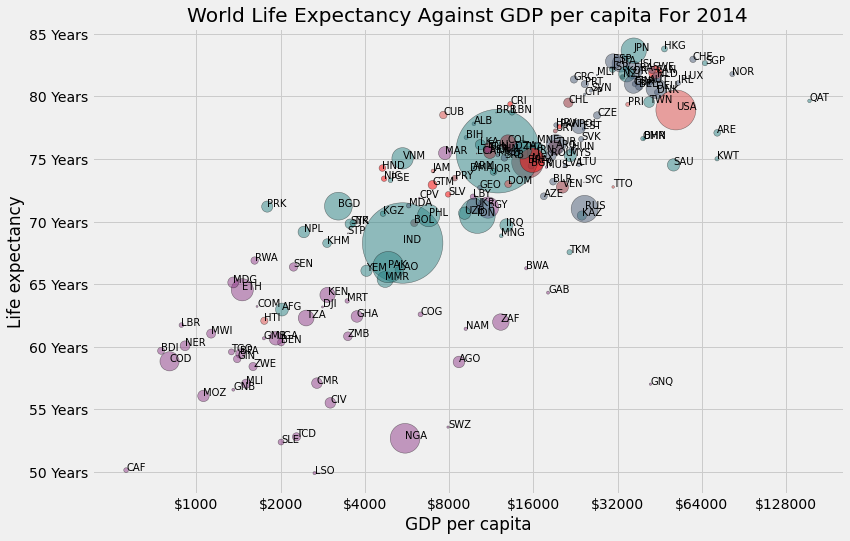

In [268]:
#Creating A Scatter Plot With The Data Now
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

#enter the year you wish to plot a graph for
year = 2014

population = world_data_maincol_year['Population (historical estimates)'] /200000
world_data_maincol_year = world_data_maincol[world_data_maincol['Year'] == year]
plt.scatter(world_data_maincol_year['GDP per capita'], world_data_maincol_year['Life expectancy'], population, c = world_data_maincol_year['Color'], alpha = 0.5, label ='Continent', edgecolors='black' )
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.xscale('log')
plt.xticks([1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000], ['$1000','$2000','$4000','$8000', '$16000', '$32000', '$64000','$128000'])
plt.yticks([50, 55, 60, 65, 70, 75, 80, 85],['50 Years','55 Years', '60 Years', '65 Years', '70 Years', '75 Years', '80 Years', '85 Years'])
plt.title('World Life Expectancy Against GDP per capita For ' + str(year))
plt.grid(True)
for lab, rows in world_data_maincol_year.iterrows():
    plt.annotate(rows['Code'], (rows['GDP per capita'], rows['Life expectancy']), fontsize=10)
plt.show()

In [267]:
#Statistics Calculation:

#Country With The Lowest GDP 
world_data_maincol_year[world_data_maincol_year['GDP per capita'] == min(world_data_maincol_year['GDP per capita'])]

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent,Color
9551,Central African Republic,CAF,2014,50.129,561.0,4464171.0,Africa,#923d8b


In [235]:
#Statistics Calculation:

#Country With The Heights GDP 
world_data_maincol_year[world_data_maincol_year['GDP per capita'] == max(world_data_maincol_year['GDP per capita'])]

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent,Color
42950,Qatar,QAT,2018,80.1,153764.171875,2781682.0,Asia,#2d8587
